In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Data/loan_train.csv')

In [3]:
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [4]:
df.isna().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

In [6]:
cols = ['Gender', 'Married', 'Dependents','Self_Employed','Term','Credit_History']
for i in cols:
    df[i] = df[i].fillna(df[i].mode()[0])

In [7]:
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

In [10]:
status_map = {
    'Y':1,
    'N':0
}

df['Status'] = df['Status'].map(status_map)

In [11]:
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,1


In [13]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [14]:
oh_e = OneHotEncoder()
scaler = StandardScaler()

In [17]:
for i in cols:
    print(f"No. of Uniqure Categories in {i} are {len(df[i].value_counts())}")

No. of Uniqure Categories in Gender are 2
No. of Uniqure Categories in Married are 2
No. of Uniqure Categories in Dependents are 4
No. of Uniqure Categories in Self_Employed are 2
No. of Uniqure Categories in Term are 10
No. of Uniqure Categories in Credit_History are 2


In [20]:
print (f"No. of Applicants with income less then 10Laks {len(df[df['Applicant_Income']<1000000])}")
print (f"No. of Applicants with income more then 10Laks {len(df[df['Applicant_Income']>1000000])}")

No. of Applicants with income less then 10Laks 559
No. of Applicants with income more then 10Laks 52


In [23]:
print(f"Maximum Loan Amount is {df['Loan_Amount'].max()}")
print(f"Minimum Loan Amount is {df['Loan_Amount'].min()}")

Maximum Loan Amount is 70000000
Minimum Loan Amount is 0


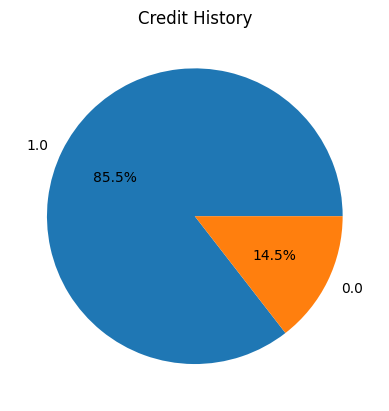

In [37]:
credit_count = df['Credit_History'].value_counts()
plt.pie(credit_count,labels=credit_count.index,autopct='%1.1f%%')
plt.title('Credit History')
plt.show()

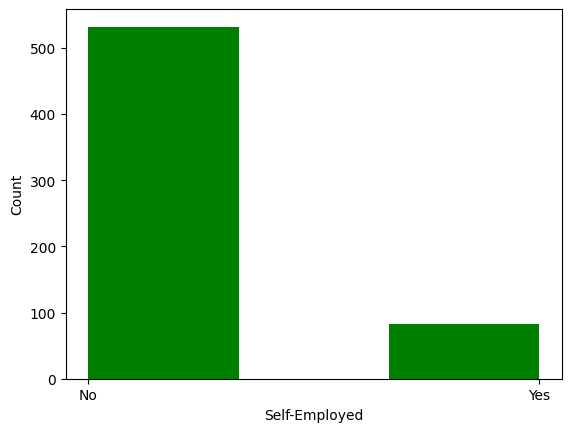

In [48]:
plt.hist(df['Self_Employed'],bins=3,color='green')
plt.xlabel('Self-Employed')
plt.ylabel('Count')
plt.show()

In [51]:
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']
print(f'We have {len(numerical_features)} numerical features: {numerical_features}')
print(f'We have {len(categorical_features)} numerical features: {categorical_features}')

We have 6 numerical features: ['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term', 'Credit_History', 'Status']
We have 6 numerical features: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Area']


In [59]:
df['Total_Income'] = df['Applicant_Income'] + df['Coapplicant_Income']

In [63]:
df.drop('Total Income',axis=1,inplace=True)

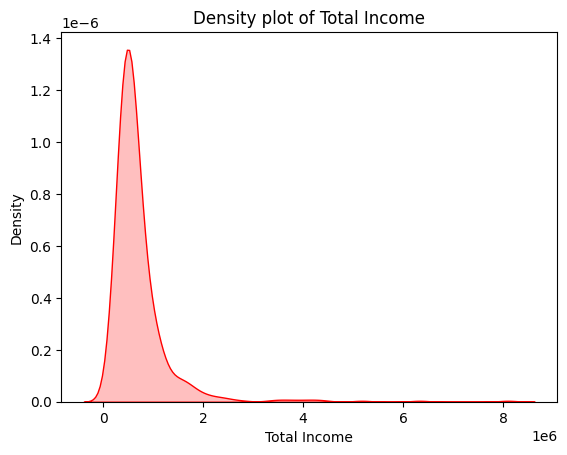

In [66]:
sns.kdeplot(df['Total_Income'],fill=True,color='red')
plt.xlabel("Total Income")
plt.ylabel("Density")
plt.title("Density plot of Total Income")
plt.show()

<Axes: >

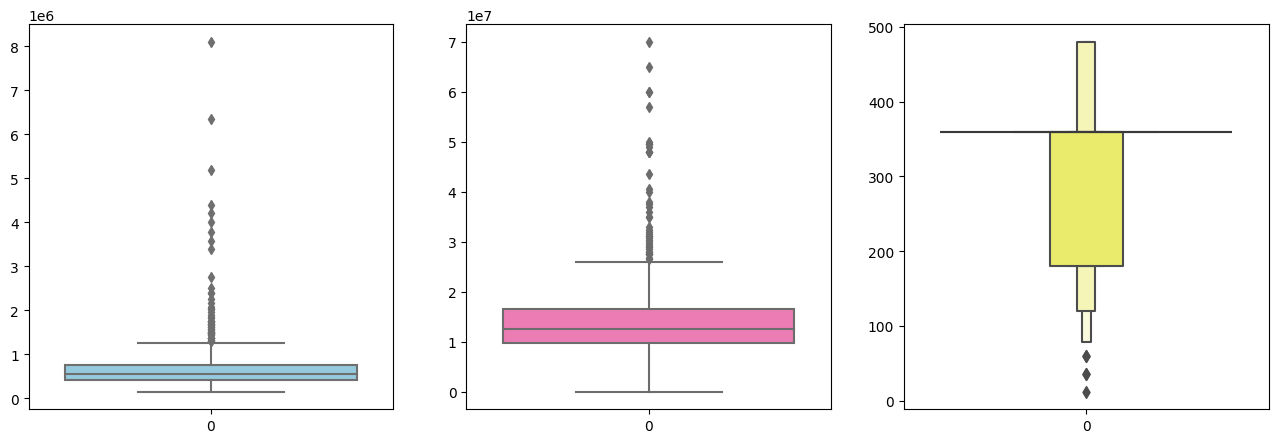

In [79]:
plt.subplots(1,3,figsize=(16,5))
plt.subplot(131)
sns.boxplot(df['Total_Income'],color='skyblue')
plt.subplot(132)
sns.boxplot(df['Loan_Amount'],color='hotpink')
plt.subplot(133)
sns.boxenplot(df['Term'],color='yellow')

In [80]:
df.shape

(614, 13)